# Poisson simulation example and validation
https://www.kdnuggets.com/2023/01/python-machine-learning-predict-football-match-winners.html

In [1]:
import pickle
from operator import itemgetter

import numpy as np
import pandas as pd
from scipy.stats import poisson

import poisson
import preds_evaluation
import utils

In [2]:
training_set = pd.read_parquet("datasets/processed/training_set_processed.parquet")
training_set

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
7102,00-01,CHN1,2000-03-19,Dalian Haichang,Beijing Guoan,2,0,2,W,2
7103,00-01,CHN1,2000-03-19,Qingdao,Shanghai Greenland,1,1,0,D,2
7108,00-01,CHN1,2000-03-19,Xiamen Xiaxin,Liaoning,3,0,3,W,3
7106,00-01,CHN1,2000-03-19,Shenzhen FC,Sichuan Guancheng,0,0,0,D,0
7105,00-01,CHN1,2000-03-19,Guangzhou Rich and Force,Chongqing Lifan,0,0,0,D,0
...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3


In [12]:
train_set = training_set[:-600]
valid_set = training_set[-600:]
print(f"Training set number of games: {train_set.shape[0]}")
print(f"Validation set number of games: {valid_set.shape[0]}")

Training set number of games: 298607
Validation set number of games: 600


In [5]:
valid_set.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
299005,22-23,TUN1,2023-01-25,ES Hammam Sousse,CA Bizertin,0,1,-1,L,1
296130,22-23,GER1,2023-01-25,Augsburg,Monchengladbach,1,0,1,W,1
296131,22-23,GER1,2023-01-25,Werder Bremen,Union Berlin,1,2,-1,L,3
296834,22-23,HOL1,2023-01-25,Utrecht,Excelsior,1,0,1,W,1
296833,22-23,HOL1,2023-01-25,For Sittard,Heerenveen,2,0,2,W,2


### Train information from all games and only from last N games

In [9]:
import warnings
warnings.filterwarnings("ignore")

team_stats_dict = utils.generate_all_teams_stats(train_set)

In [15]:
print(len(team_stats_dict))
team_stats_dict

1634


[{'name': 'Celtic Glasgow',
  'total_games': 845,
  'wins': 633,
  'draws': 127,
  'losses': 85,
  'win_percentage': 0.749,
  'draw_percentage': 0.15,
  'loss_percentage': 0.101,
  'goals_scored': 1974,
  'goals_against': 607,
  'goals_difference': 1367,
  'avg_goals_scored': 2.336,
  'avg_goals_against': 0.718,
  'avg_goals_difference': 1.618,
  'home_games': 423,
  'home_wins': 344,
  'home_draws': 55,
  'home_losses': 24,
  'home_win_percentage': 0.813,
  'home_draw_percentage': 0.13,
  'home_loss_percentage': 0.057,
  'home_goals_scored': 1072,
  'home_goals_against': 239,
  'home_goals_difference': 833,
  'home_avg_goals_scored': 2.534,
  'home_avg_goals_against': 0.565,
  'home_avg_goals_difference': 1.969,
  'away_games': 422,
  'away_wins': 289,
  'away_draws': 72,
  'away_losses': 61,
  'away_win_percentage': 0.685,
  'away_draw_percentage': 0.171,
  'away_loss_percentage': 0.145,
  'away_goals_scored': 902,
  'away_goals_against': 368,
  'away_goals_difference': 534,
  'away_

In [36]:
team_stats_restricted = utils.generate_all_teams_stats(train_set, n_recent_games=10)

In [37]:
print(len(team_stats_restricted))
team_stats_restricted

1634


[{'name': 'Celtic Glasgow',
  'total_games': 10,
  'wins': 9,
  'draws': 1,
  'losses': 0,
  'win_percentage': 0.9,
  'draw_percentage': 0.1,
  'loss_percentage': 0.0,
  'goals_scored': 27,
  'goals_against': 8,
  'goals_difference': 19,
  'avg_goals_scored': 2.7,
  'avg_goals_against': 0.8,
  'avg_goals_difference': 1.9,
  'home_games': 6,
  'home_wins': 6,
  'home_draws': 0,
  'home_losses': 0,
  'home_win_percentage': 1.0,
  'home_draw_percentage': 0.0,
  'home_loss_percentage': 0.0,
  'home_goals_scored': 18,
  'home_goals_against': 5,
  'home_goals_difference': 13,
  'home_avg_goals_scored': 3.0,
  'home_avg_goals_against': 0.833,
  'home_avg_goals_difference': 2.167,
  'away_games': 4,
  'away_wins': 3,
  'away_draws': 1,
  'away_losses': 0,
  'away_win_percentage': 0.75,
  'away_draw_percentage': 0.25,
  'away_loss_percentage': 0.0,
  'away_goals_scored': 9,
  'away_goals_against': 3,
  'away_goals_difference': 6,
  'away_avg_goals_scored': 2.25,
  'away_avg_goals_against': 0.75

### Predict Poisson using prior information from all games and only from recent games

In [38]:
df_preds_all = poisson.predict_dataset(valid_set, team_stats_dict)
df_preds_restricted = poisson.predict_dataset(valid_set, team_stats_restricted)

In [25]:
df_preds_all

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals,pr_HS,prd_AS,prd_W,prd_D,prd_L,RMSE,RPS
299005,22-23,TUN1,2023-01-25,ES Hammam Sousse,CA Bizertin,0,1,-1,L,1,0.0,1.0,0.241173,0.293187,0.465640,0.0,0.171853
296130,22-23,GER1,2023-01-25,Augsburg,Monchengladbach,1,0,1,W,1,1.0,2.0,0.340184,0.207812,0.452004,4.0,0.319832
296131,22-23,GER1,2023-01-25,Werder Bremen,Union Berlin,1,2,-1,L,3,2.0,2.0,0.407975,0.195892,0.396132,1.0,0.265550
296834,22-23,HOL1,2023-01-25,Utrecht,Excelsior,1,0,1,W,1,3.0,1.0,0.656017,0.157942,0.186037,5.0,0.076468
296833,22-23,HOL1,2023-01-25,For Sittard,Heerenveen,2,0,2,W,2,1.0,3.0,0.171081,0.145205,0.683703,10.0,0.577286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7,0.0,1.0,0.252768,0.306131,0.441102,18.0,0.188129
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2,1.0,0.0,0.573944,0.252307,0.173749,5.0,0.506051
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4,0.0,0.0,0.341908,0.325823,0.332269,8.0,0.113652
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3,1.0,1.0,0.363845,0.295871,0.340284,1.0,0.260243


In [39]:
df_preds_all = df_preds_all[df_preds_all["pr_HS"].notna()]
df_preds_all

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals,pr_HS,prd_AS,prd_W,prd_D,prd_L
299005,22-23,TUN1,2023-01-25,ES Hammam Sousse,CA Bizertin,0,1,-1,L,1,0.0,1.0,0.241173,0.293187,0.465640
296130,22-23,GER1,2023-01-25,Augsburg,Monchengladbach,1,0,1,W,1,1.0,2.0,0.340184,0.207812,0.452004
296131,22-23,GER1,2023-01-25,Werder Bremen,Union Berlin,1,2,-1,L,3,2.0,2.0,0.407975,0.195892,0.396132
296834,22-23,HOL1,2023-01-25,Utrecht,Excelsior,1,0,1,W,1,3.0,1.0,0.656017,0.157942,0.186037
296833,22-23,HOL1,2023-01-25,For Sittard,Heerenveen,2,0,2,W,2,1.0,3.0,0.171081,0.145205,0.683703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7,0.0,1.0,0.252768,0.306131,0.441102
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2,1.0,0.0,0.573944,0.252307,0.173749
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4,0.0,0.0,0.341908,0.325823,0.332269
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3,1.0,1.0,0.363845,0.295871,0.340284


In [40]:
df_preds_restricted

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals,pr_HS,prd_AS,prd_W,prd_D,prd_L
299005,22-23,TUN1,2023-01-25,ES Hammam Sousse,CA Bizertin,0,1,-1,L,1,0.0,1.0,0.227338,0.293205,0.479457
296130,22-23,GER1,2023-01-25,Augsburg,Monchengladbach,1,0,1,W,1,3.0,4.0,0.317175,0.134642,0.547832
296131,22-23,GER1,2023-01-25,Werder Bremen,Union Berlin,1,2,-1,L,3,2.0,3.0,0.282453,0.163197,0.554342
296834,22-23,HOL1,2023-01-25,Utrecht,Excelsior,1,0,1,W,1,3.0,1.0,0.746975,0.129447,0.123564
296833,22-23,HOL1,2023-01-25,For Sittard,Heerenveen,2,0,2,W,2,1.0,1.0,0.248680,0.244695,0.506625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7,0.0,0.0,0.397048,0.406738,0.196215
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2,2.0,0.0,0.734293,0.173910,0.091797
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4,0.0,0.0,0.462267,0.416905,0.120829
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3,1.0,0.0,0.414857,0.291709,0.293434


In [41]:
df_preds_restricted = df_preds_restricted[df_preds_restricted["pr_HS"].notna()]
df_preds_restricted

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals,pr_HS,prd_AS,prd_W,prd_D,prd_L
299005,22-23,TUN1,2023-01-25,ES Hammam Sousse,CA Bizertin,0,1,-1,L,1,0.0,1.0,0.227338,0.293205,0.479457
296130,22-23,GER1,2023-01-25,Augsburg,Monchengladbach,1,0,1,W,1,3.0,4.0,0.317175,0.134642,0.547832
296131,22-23,GER1,2023-01-25,Werder Bremen,Union Berlin,1,2,-1,L,3,2.0,3.0,0.282453,0.163197,0.554342
296834,22-23,HOL1,2023-01-25,Utrecht,Excelsior,1,0,1,W,1,3.0,1.0,0.746975,0.129447,0.123564
296833,22-23,HOL1,2023-01-25,For Sittard,Heerenveen,2,0,2,W,2,1.0,1.0,0.248680,0.244695,0.506625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7,0.0,0.0,0.397048,0.406738,0.196215
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2,2.0,0.0,0.734293,0.173910,0.091797
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4,0.0,0.0,0.462267,0.416905,0.120829
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3,1.0,0.0,0.414857,0.291709,0.293434


In [43]:
RMSE, RPS = preds_evaluation.evaluate_validation(df_preds_restricted)
print(RMSE, RPS)

1.9907504234137807 0.23326506675412934


### Check for N values

In [51]:
RMSE, RPS = preds_evaluation.evaluate_validation(df_preds_all)
print(f"With all games in training set: {RMSE}, {RPS}")

With all games in training set: 1.733987142223371, 0.2238247397314092


In [61]:
n_games_to_check = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, "all"]
rmse, rps = list(), list()
for n in n_games_to_check:
    # Training info only for n games more recent
    if n == "all":
        team_stats = utils.generate_all_teams_stats(train_set)
    else:
        team_stats = utils.generate_all_teams_stats(train_set, n_recent_games=n)
    # Predict validation set with that info
    df_preds = poisson.predict_dataset(valid_set, team_stats)
    # Missing values in games are dropped
    df_preds = df_preds[df_preds["pr_HS"].notna()]
    RMSE, RPS = preds_evaluation.evaluate_validation(df_preds)
    rmse.append(RMSE)
    rps.append(RPS)
    print(f"With {n} more recent games: {RMSE}, {RPS}")

With 5 more recent games: 2.289822829522849, 0.2576699481689452
With 10 more recent games: 1.9907504234137807, 0.23326506675412934
With 15 more recent games: 1.93822377691431, 0.22630158176864107
With 20 more recent games: 1.9147081716413954, 0.22751369786573056
With 25 more recent games: 1.8703802147293493, 0.2210280439161647
With 30 more recent games: 1.8268137075650739, 0.22101480317330538
With 40 more recent games: 1.7859443763556135, 0.22142200099343926
With 50 more recent games: 1.7661051828185441, 0.22184623058340242
With 60 more recent games: 1.771796191712366, 0.22286514200925356
With 70 more recent games: 1.7498801492995888, 0.22507148584200118
With 80 more recent games: 1.750838725185943, 0.22487186816419266
With all more recent games: 1.733987142223371, 0.2238247397314092


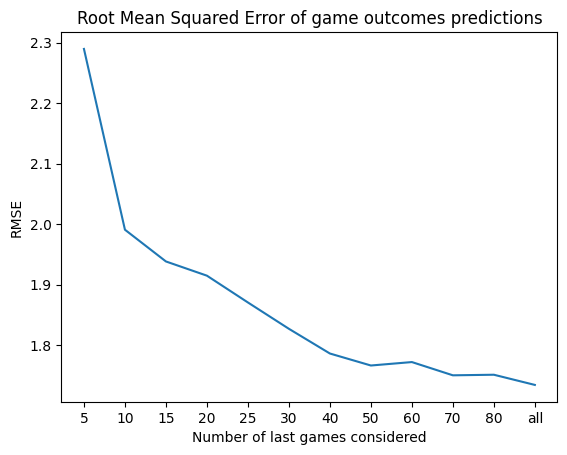

In [62]:
import matplotlib.pyplot as plt

plt.plot(n_games_to_check, rmse, label="RMSE")
plt.title('Root Mean Squared Error of game outcomes predictions')
plt.xlabel('Number of last games considered')
plt.ylabel('RMSE')
plt.show()

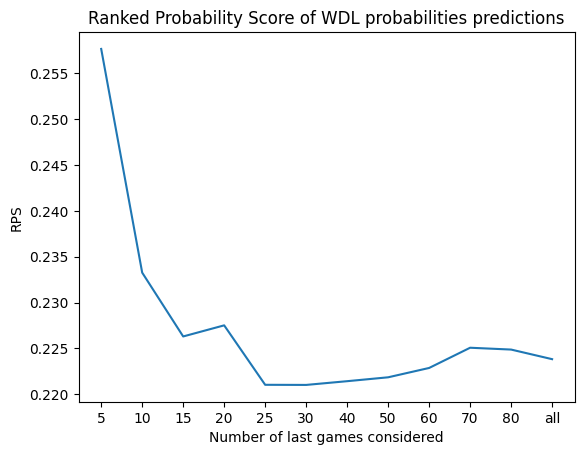

In [63]:
plt.plot(n_games_to_check, rps, label="RPS")
plt.title('Ranked Probability Score of WDL probabilities predictions')
plt.xlabel('Number of last games considered')
plt.ylabel('RPS')
plt.show()